In [1]:
!pip install requests pandas


In [2]:
import requests
import pandas as pd
import random


In [3]:
API_KEY = '88539f10ee044627a077255d12016436'  # Your NewsAPI key here

def fetch_news():
    url = f"https://newsapi.org/v2/top-headlines?language=en&pageSize=10&apiKey={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        articles = response.json()['articles']

        news_data = []
        for article in articles:
            news_data.append({
                'title': article['title'],
                'description': article['description'],
                'content': article['content'],
                'url': article['url'],
                'publishedAt': article['publishedAt'],
            })

        return news_data
    else:
        print(f"Error fetching news: {response.status_code}")
        return []

# Fetch news articles
news = fetch_news()


In [4]:
for i, article in enumerate(news[:3], start=1):
    print(f"Article {i}:")
    print(f"Title: {article['title']}")
    print(f"Description: {article['description']}")
    print(f"URL: {article['url']}\n")


Article 1:
Title: How to get more of a nutrient that might help your memory - The Washington Post
Description: Many people don’t get enough choline, which is important for body and cognitive functions. Here’s how to make sure you’re getting enough.
URL: https://www.washingtonpost.com/wellness/2025/04/28/choline-nutrient-memory-brain-health/

Article 2:
Title: ‘Tale of two Petes’: Fired adviser describes Pentagon chief consumed by image - Politico
Description: Colin Carroll said the Defense secretary was focused on identifying leakers and proving his competence.
URL: https://www.politico.com/news/2025/04/28/caroll-hegseth-pentagon-00312849

Article 3:
Title: S&P 500 declines as Big Tech falls before earnings, investors await trade deals: Live updates - CNBC
Description: Investors are looking to the busiest period of the first-quarter earnings season, which will see more than 180 S&P 500 companies report results.
URL: https://www.cnbc.com/2025/04/27/stock-futures-slip-ahead-of-busy-earni

In [5]:
# Example user IDs
user_ids = [101, 102, 103, 104]

# Simulate interactions for each user
interactions = []

for user_id in user_ids:
    for article in news:
        # Simulate random interactions (click/like)
        interaction_type = random.choice(['click', 'like'])
        time_spent = random.randint(20, 120)  # Random time spent in seconds

        interactions.append({
            'user_id': user_id,
            'article_id': article['url'],  # Using article URL as unique ID
            'interaction': interaction_type,
            'time_spent': time_spent
        })

# Display first 5 simulated interactions
for interaction in interactions[:5]:
    print(interaction)


{'user_id': 101, 'article_id': 'https://www.washingtonpost.com/wellness/2025/04/28/choline-nutrient-memory-brain-health/', 'interaction': 'like', 'time_spent': 104}
{'user_id': 101, 'article_id': 'https://www.politico.com/news/2025/04/28/caroll-hegseth-pentagon-00312849', 'interaction': 'like', 'time_spent': 76}
{'user_id': 101, 'article_id': 'https://www.cnbc.com/2025/04/27/stock-futures-slip-ahead-of-busy-earnings-week-live-updates.html', 'interaction': 'click', 'time_spent': 60}
{'user_id': 101, 'article_id': 'https://www.avclub.com/weekend-box-office-sinners-record', 'interaction': 'like', 'time_spent': 116}
{'user_id': 101, 'article_id': 'https://www.bbc.com/news/live/cr5d13e4r2rt', 'interaction': 'click', 'time_spent': 96}


In [6]:
df_interactions = pd.DataFrame(interactions)

# Display the first few rows of interactions
df_interactions.head()


,user_id,article_id,interaction,time_spent
0,101,https://www.washingtonpost.com/wellness/2025/0...,like,104
1,101,https://www.politico.com/news/2025/04/28/carol...,like,76
2,101,https://www.cnbc.com/2025/04/27/stock-futures-...,click,60
3,101,https://www.avclub.com/weekend-box-office-sinn...,like,116
4,101,https://www.bbc.com/news/live/cr5d13e4r2rt,click,96


In [7]:
df_interactions.to_csv('/content/user_interactions.csv', index=False)


In [9]:
# Aggregate articles interacted with by each user
user_profiles = {}

for interaction in interactions:
    user_id = interaction['user_id']
    article_url = interaction['article_id']
    content = next((article['content'] for article in news if article['url'] == article_url), '')

    # Ensure content is not None, if None, use an empty string
    if content is None:
        content = ''

    if user_id not in user_profiles:
        user_profiles[user_id] = []
    user_profiles[user_id].append(content)

# Use CountVectorizer to extract features for each user's interactions
vectorizer = CountVectorizer(stop_words='english')
user_profiles_vectorized = {}

for user_id, articles in user_profiles.items():
    user_profile_text = " ".join(articles)
    user_profiles_vectorized[user_id] = vectorizer.fit_transform([user_profile_text]).toarray()

# Display user profile vectors
for user_id, profile in user_profiles_vectorized.items():
    print(f"User {user_id} Profile: {profile}")


User 101 Profile: [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 2 1 1 1 1 1 1
  1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 1 1]]
User 102 Profile: [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 2 1 1 1 1 1 1
  1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 1 1]]
User 103 Profile: [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 2 1 1 1 1 1 1
  1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 1 1]]
User 104 Profile: [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 2 1 1 1 1 1 1
  1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 

In [13]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Step 1: Encode article content into embeddings using Sentence-BERT
article_embeddings = model.encode([article['content'] for article in valid_articles])

# Step 2: For each user, calculate the similarity between their profile and the articles
personalized_recommendations = {}

for user_id, profile in user_profiles_vectorized.items():
    # Generate embedding for user profile (combine user-interacted articles)
    user_profile_text = " ".join(user_profiles[user_id])  # Combine articles into a single text
    user_profile_embedding = model.encode(user_profile_text)

    # Step 3: Calculate cosine similarity between user profile and articles
    user_similarity = cosine_similarity([user_profile_embedding], article_embeddings)

    # Step 4: Get the indices of the top 5 most similar articles
    top_article_indices = user_similarity[0].argsort()[-5:][::-1]

    # Store recommendations for this user
    recommended_articles = []
    for idx in top_article_indices:
        article = valid_articles[idx]
        recommended_articles.append({
            'title': article['title'],
            'url': article['url'],
            'description': article['description']
        })

    personalized_recommendations[user_id] = recommended_articles

# Display personalized recommendations for each user
for user_id, recommendations in personalized_recommendations.items():
    print(f"Personalized News Feed for User {user_id}:")
    for article in recommendations:
        print(f"Title: {article['title']}\nURL: {article['url']}\nDescription: {article['description']}\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Personalized News Feed for User 101:
Title: How to get more of a nutrient that might help your memory - The Washington Post
URL: https://www.washingtonpost.com/wellness/2025/04/28/choline-nutrient-memory-brain-health/
Description: Many people don’t get enough choline, which is important for body and cognitive functions. Here’s how to make sure you’re getting enough.

Title: S&P 500 declines as Big Tech falls before earnings, investors await trade deals: Live updates - CNBC
URL: https://www.cnbc.com/2025/04/27/stock-futures-slip-ahead-of-busy-earnings-week-live-updates.html
Description: Investors are looking to the busiest period of the first-quarter earnings season, which will see more than 180 S&P 500 companies report results.

Title: ‘Tale of two Petes’: Fired adviser describes Pentagon chief consumed by image - Politico
URL: https://www.politico.com/news/2025/04/28/caroll-hegseth-pentagon-00312849
Description: Colin Carroll said the Defense secretary was focused on identifying leake

In [14]:
# Simulate new interactions (click, like)
new_interactions = [
    {'user_id': 101, 'article_id': news[0]['url'], 'interaction': 'click', 'time_spent': 60},
    {'user_id': 102, 'article_id': news[1]['url'], 'interaction': 'like', 'time_spent': 120}
]

# Update user profiles with new interactions
for interaction in new_interactions:
    user_id = interaction['user_id']
    article_url = interaction['article_id']
    content = next((article['content'] for article in news if article['url'] == article_url), '')

    if content:
        user_profiles[user_id].append(content)

# Re-vectorize user profiles (optional: vectorize every time profiles change)
user_profiles_vectorized = {}

for user_id, articles in user_profiles.items():
    user_profile_text = " ".join(articles)
    user_profiles_vectorized[user_id] = model.encode([user_profile_text])

# Now, generate new personalized recommendations with updated user profiles
# (Same recommendation process as before)


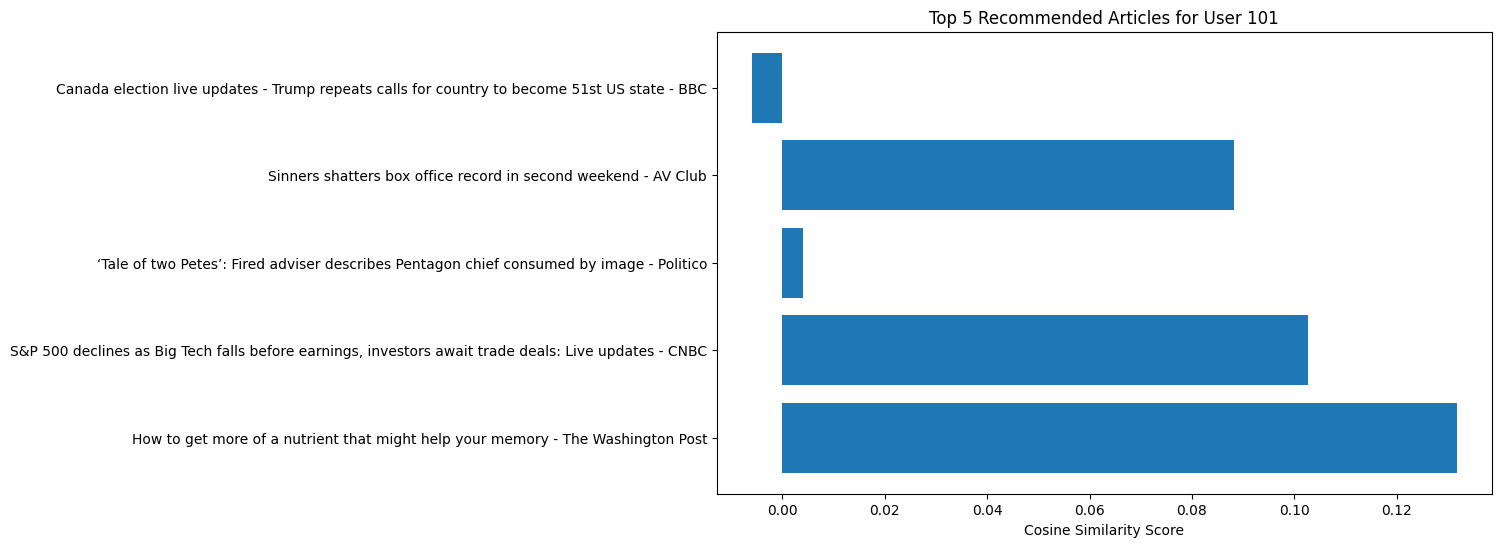

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Visualize top 5 recommended articles for User 101
user_id = 101
recommended_articles = personalized_recommendations[user_id]

# Get the top 5 articles and their similarity scores
article_titles = [article['title'] for article in recommended_articles]
# Use 'description' instead of 'content' for similarity calculation
similarity_scores = [cosine_similarity([model.encode(" ".join(user_profiles[user_id]))], [model.encode(article['description'] or "")])[0][0] for article in recommended_articles]

plt.figure(figsize=(10, 6))
plt.barh(article_titles, similarity_scores)
plt.xlabel('Cosine Similarity Score')
plt.title(f"Top 5 Recommended Articles for User {user_id}")
plt.show()

